In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('day8_weather_outbreaks.csv')
df

,WindSpeed,Temperature,Humidity,Rainfall,Outbreak
0,17.5,30.4,41.1,2.6,0
1,14.3,31.2,56.0,12.8,0
2,18.2,33.3,65.1,12.7,0
3,22.6,33.2,65.7,10.2,0
4,13.8,23.5,58.2,11.8,0
...,...,...,...,...,...
195,16.9,27.1,57.3,27.6,1
196,10.6,22.1,61.0,13.2,0
197,15.8,34.4,50.3,2.4,0
198,15.3,28.5,58.3,0.3,0


In [3]:
df.isnull().sum()

WindSpeed      0
Temperature    0
Humidity       0
Rainfall       0
Outbreak       0
dtype: int64

C:\Users\Lommy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


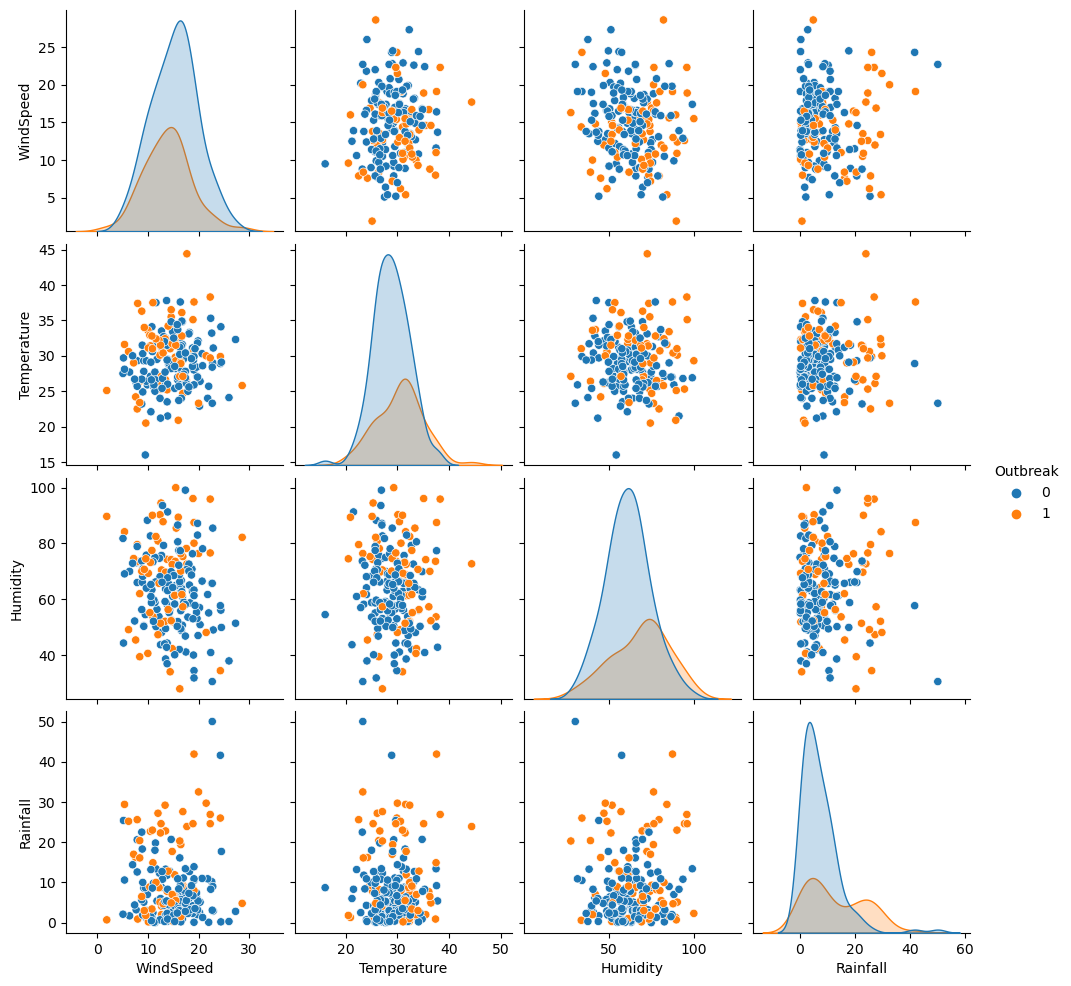

In [4]:
sns.pairplot(df, hue='Outbreak')
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
y = df['Outbreak']
X = df.drop(columns='Outbreak')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [8]:
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print('Naive Bayes Results')
print('Accuracy: ', accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results
Accuracy:  0.725
[[23  5]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.55      0.50      0.52        12

    accuracy                           0.73        40
   macro avg       0.67      0.66      0.66        40
weighted avg       0.72      0.72      0.72        40



In [9]:
#K_Nearest_Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print('KNN Results')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results
[[22  6]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.50      0.50      0.50        12

    accuracy                           0.70        40
   macro avg       0.64      0.64      0.64        40
weighted avg       0.70      0.70      0.70        40

